In [66]:
# Notebook containing different forcasting models

In [67]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
from datetime import date

# Importing functions from src/data
parent_dir = os.path.abspath(os.path.join('..'))
module_path = parent_dir + "/src/data"

if module_path not in sys.path:
    sys.path.append(module_path)
    
from helpers import create_item_dataframe

In [68]:
df = create_item_dataframe("Silicon", "0")

Command executed successfully
Command executed successfully


In [69]:
df = df[df.time > '2022-05-31']
df

,time,buy_weightedAverage,buy_max,buy_min,buy_stddev,buy_median,buy_volume,buy_orderCount,buy_percentile,sell_weightedAverage,sell_max,sell_min,sell_stddev,sell_median,sell_volume,sell_orderCount,sell_percentile
0,2022-05-31 20:00:39.045802,326.975600,600.0,0.01,170.722074,400.00,19685167.0,77,564.817238,641.592850,1894.0,266.1,179.811435,598.55,9885154.0,82,353.266682
134,2022-05-31 00:00:40.991810,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.801850,1894.0,266.1,178.091270,598.55,9846098.0,82,353.128907
135,2022-05-31 01:00:40.873256,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.801850,1894.0,266.1,178.091270,598.55,9846098.0,82,353.128907
136,2022-05-31 02:00:38.231644,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.855785,1894.0,266.1,179.125326,598.70,9838143.0,81,353.100711
137,2022-05-31 03:00:41.165245,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.857475,1894.0,266.1,179.100366,598.70,9839743.0,81,353.106385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2022-06-11 17:00:39.598973,330.983951,600.0,0.01,180.909280,405.00,20684404.0,67,570.925324,647.795024,1894.0,266.1,194.552757,599.55,8146596.0,66,378.692824
415,2022-06-11 18:00:39.656931,320.688833,600.0,0.01,178.261947,400.65,19818939.0,62,567.286303,640.994634,1894.0,260.0,196.642021,599.05,8293416.0,68,334.055980
416,2022-06-11 19:00:39.987073,320.986477,600.0,0.01,176.822610,400.10,19980939.0,63,567.202905,640.859197,1894.0,260.0,196.545261,599.05,8324416.0,68,334.256867
417,2022-06-11 20:00:38.449805,320.986477,600.0,0.01,176.822610,400.10,19980939.0,63,567.202905,641.038999,1894.0,260.0,197.993989,599.00,8154415.0,67,333.136444


In [70]:
df['time_int'] = [i for i in range(df.shape[0])]
df

,time,buy_weightedAverage,buy_max,buy_min,buy_stddev,buy_median,buy_volume,buy_orderCount,buy_percentile,sell_weightedAverage,sell_max,sell_min,sell_stddev,sell_median,sell_volume,sell_orderCount,sell_percentile,time_int
0,2022-05-31 20:00:39.045802,326.975600,600.0,0.01,170.722074,400.00,19685167.0,77,564.817238,641.592850,1894.0,266.1,179.811435,598.55,9885154.0,82,353.266682,0
134,2022-05-31 00:00:40.991810,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.801850,1894.0,266.1,178.091270,598.55,9846098.0,82,353.128907,1
135,2022-05-31 01:00:40.873256,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.801850,1894.0,266.1,178.091270,598.55,9846098.0,82,353.128907,2
136,2022-05-31 02:00:38.231644,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.855785,1894.0,266.1,179.125326,598.70,9838143.0,81,353.100711,3
137,2022-05-31 03:00:41.165245,327.639856,600.0,0.01,171.425322,400.00,19742007.0,77,564.718504,641.857475,1894.0,266.1,179.100366,598.70,9839743.0,81,353.106385,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2022-06-11 17:00:39.598973,330.983951,600.0,0.01,180.909280,405.00,20684404.0,67,570.925324,647.795024,1894.0,266.1,194.552757,599.55,8146596.0,66,378.692824,281
415,2022-06-11 18:00:39.656931,320.688833,600.0,0.01,178.261947,400.65,19818939.0,62,567.286303,640.994634,1894.0,260.0,196.642021,599.05,8293416.0,68,334.055980,282
416,2022-06-11 19:00:39.987073,320.986477,600.0,0.01,176.822610,400.10,19980939.0,63,567.202905,640.859197,1894.0,260.0,196.545261,599.05,8324416.0,68,334.256867,283
417,2022-06-11 20:00:38.449805,320.986477,600.0,0.01,176.822610,400.10,19980939.0,63,567.202905,641.038999,1894.0,260.0,197.993989,599.00,8154415.0,67,333.136444,284


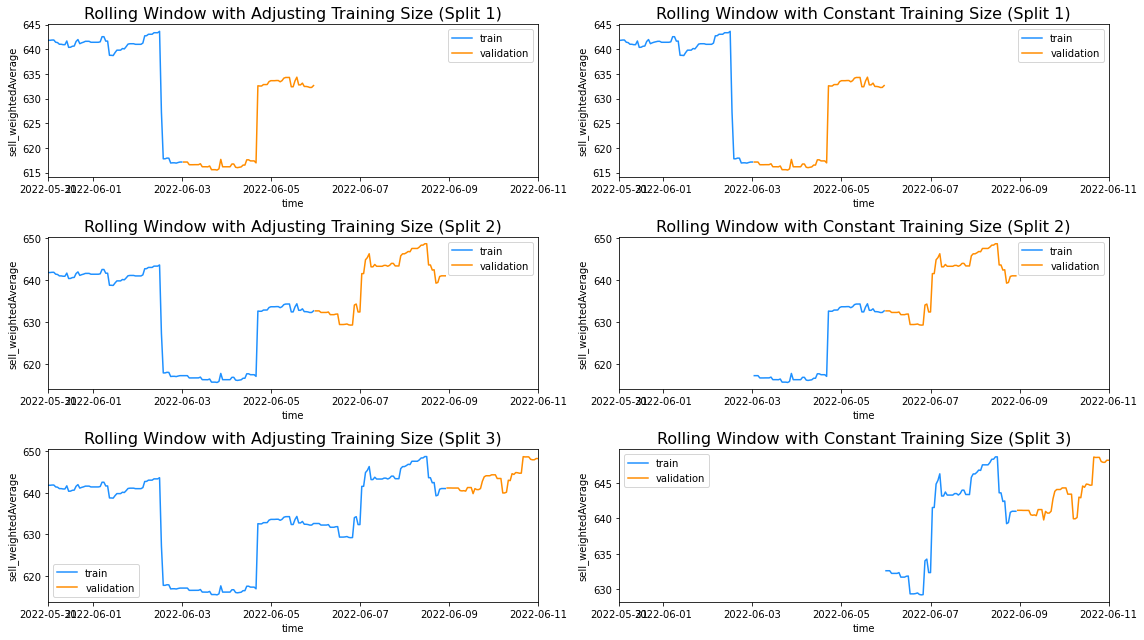

In [82]:


X = df.time
y = df.sell_weightedAverage

SPLITS = 3
folds = TimeSeriesSplit(n_splits=SPLITS)

f, ax = plt.subplots(nrows=SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(SPLITS):
    ax[i, 0].set_xlim([date(2022, 5, 31), date(2022, 6, 11)])
    ax[i, 1].set_xlim([date(2022, 5, 31), date(2022, 6, 11)])

plt.tight_layout()
plt.show()

# Modeling

## 1. Naive Approach

## 2. Moving Average

## 3. ARIMA